# The Sparks Foundation
# Data Science & Business Analytics Task Internship

##Task 2 - Prediction using Unsupervised ML
##This notebook will walk through some of the basics of K-Means Clustering.

## Author: Mohit Tukaram Kumbhare
##Batch January 2022

In [41]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Load the iris dataset from sklearn
from sklearn import datasets 
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values 

In [43]:
# y = iris.target

In [55]:
# kmeans
# Within Cluster Sum Of Square (WCSS)
# to find the optimum number of clusters for K Means use elbow method
wcss = []
clusters = list(range(1,9))

for k in clusters:
    model = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    model.fit(x)
    wcss.append(model.inertia_)

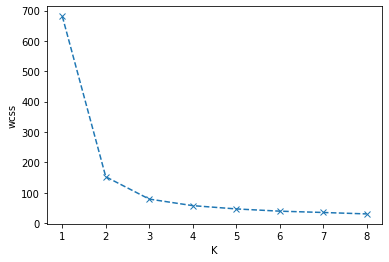

In [45]:
# elbow
plt.figure()
plt.plot(clusters,wcss,"x--")
plt.xlabel("K")
plt.ylabel("wcss")
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [46]:
# final model
final_model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
final_model.fit(x)

KMeans(n_clusters=3, random_state=1)

In [47]:
final_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [56]:
# Addind new predicted values to iris data which is species
iris_df["labels"] = final_model.labels_

In [49]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [50]:
# Mean of Labels
iris_df.groupby("labels").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [51]:
# Data With Species Label as 0
iris_df[iris_df["labels"]==0]["petal width (cm)"]

50     1.4
51     1.5
53     1.3
54     1.5
55     1.3
      ... 
133    1.5
138    1.8
142    1.9
146    1.9
149    1.8
Name: petal width (cm), Length: 62, dtype: float64

In [52]:
# Data With Species Label as 1
iris_df[iris_df["labels"]==1]["petal width (cm)"].head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal width (cm), dtype: float64

In [53]:
# Data With Species Label as 2
iris_df[iris_df["labels"]==2]["petal width (cm)"].head()

52     1.5
77     1.7
100    2.5
102    2.1
103    1.8
Name: petal width (cm), dtype: float64

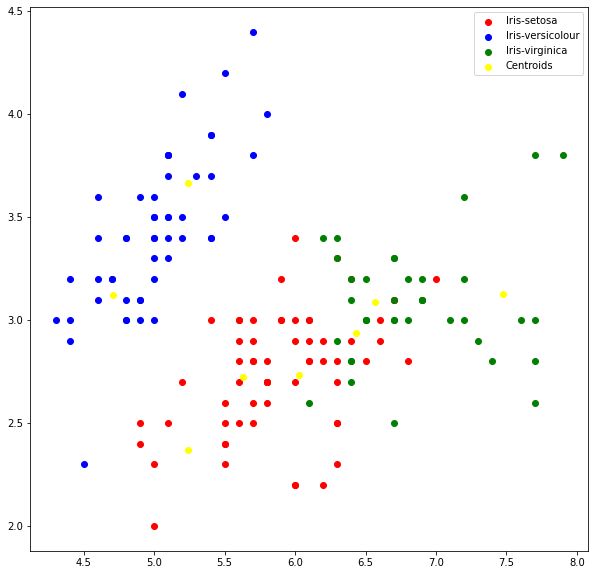

In [57]:
# Visualising Cluster On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[final_model.labels_ == 0, 0], x[final_model.labels_ == 0, 1], color = 'red', label = 'Iris-setosa')
plt.scatter(x[final_model.labels_ == 1, 0], x[final_model.labels_ == 1, 1], color = 'blue', label = 'Iris-versicolour')
plt.scatter(x[final_model.labels_ == 2, 0], x[final_model.labels_ == 2, 1], color = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], color = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

This concludes the K-Means Workshop.